In [1]:
pip install xlrd

You should consider upgrading via the 'c:\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
# Работает под гуглом колаб
# Скачивание файла (Здесь архив погоды по Калининграду с 01.02.2005 по 31.01.2022)
#!wget -O "weather.xls.gz" "http://93.90.217.253/download/files.synop/26/26702.01.02.2005.01.02.2022.1.0.0.ru.utf8.00000000.xls.gz"
# Распаковка архива
#!gzip -df "weather.xls.gz"

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [4]:
data = pd.read_excel('weather_klg.xls', skiprows=6)
# Удаляем пропуски
data = data[data['T'].notna()]
# Преобразуем российский формат дат для дальнейшего анализа
data['date'] = pd.to_datetime(data['Местное время в Калининграде'], dayfirst=True)

In [5]:
data.sort_values(by='date',ascending=True).head(5)

,Местное время в Калининграде,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Ch,VV,Td,RRR,tR,E,Tg,E',sss,date
49056,01.02.2005 02:00,0.6,747.6,749.6,NaN,77.0,"Ветер, дующий с запада",2.0,3.0,4.0,...,NaN,4,-3.0,NaN,NaN,NaN,NaN,NaN,NaN,2005-02-01 02:00:00
49055,01.02.2005 05:00,0.0,747.6,749.6,NaN,80.0,"Ветер, дующий с западо-юго-запада",1.0,3.0,4.0,...,NaN,4,-3.0,NaN,NaN,NaN,NaN,NaN,NaN,2005-02-01 05:00:00
49054,01.02.2005 08:00,2.0,751.6,752.0,NaN,96.0,"Ветер, дующий с северо-северо-запада",6.0,10.0,10.0,...,NaN,20,1.5,NaN,NaN,NaN,NaN,Ровный слой слежавшегося или мокрого снега пок...,7,2005-02-01 08:00:00
49053,01.02.2005 11:00,2.6,751.0,753.0,NaN,84.0,"Ветер, дующий с запада",1.0,3.0,5.0,...,NaN,4,0.2,NaN,NaN,NaN,NaN,NaN,NaN,2005-02-01 11:00:00
49052,01.02.2005 14:00,3.5,752.7,754.6,NaN,76.0,"Ветер, дующий с западо-северо-запада",2.0,6.0,6.0,...,NaN,4,-0.3,NaN,NaN,NaN,NaN,NaN,NaN,2005-02-01 14:00:00


In [6]:
data.columns  # Атрибут объекта - список колонок

Index(['Местное время в Калининграде', 'T', 'Po', 'P', 'Pa', 'U', 'DD', 'Ff',
       'ff10', 'ff3', 'N', 'WW', 'W1', 'W2', 'Tn', 'Tx', 'Cl', 'Nh', 'H', 'Cm',
       'Ch', 'VV', 'Td', 'RRR', 'tR', 'E', 'Tg', 'E'', 'sss', 'date'],
      dtype='object')

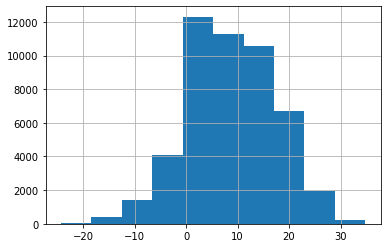

In [7]:
# Гистограмма - график, который показывает, сколько раз встречалось то или иное значние
data['T'].hist();

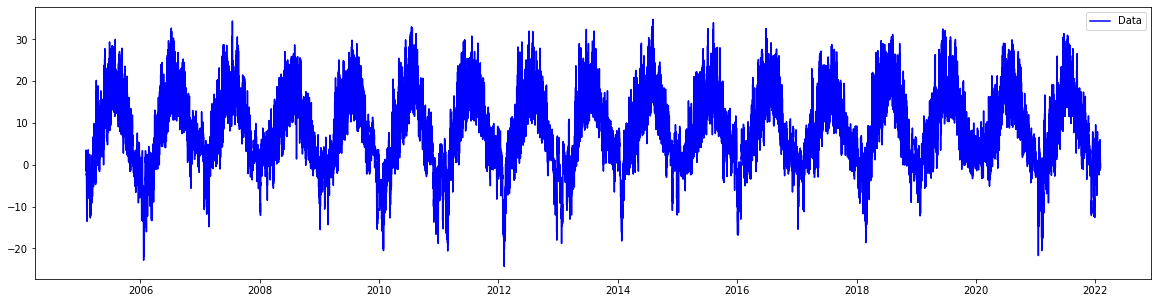

In [8]:
plt.figure(figsize=(20, 5))
plt.plot(data['date'], data['T'], color='blue', label='Data')
plt.legend();

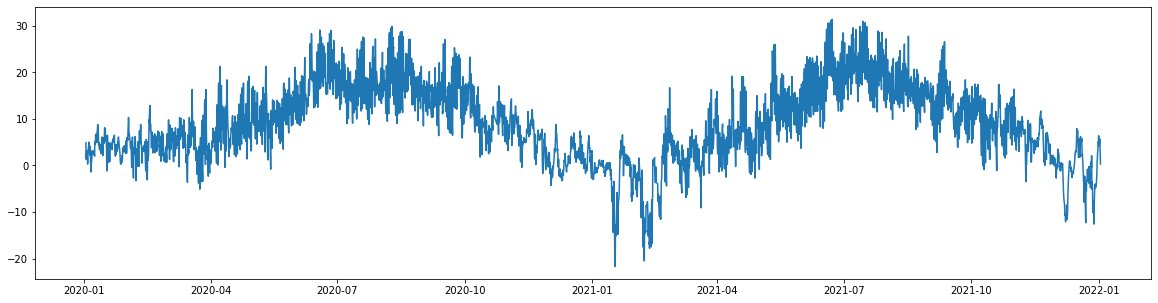

In [9]:
plt.figure(figsize=(20, 5))
data_short2 = data[data['date'].between('2020-01-02', '2022-01-02')]
plt.plot(data_short2['date'], data_short2['T']);

In [10]:
#t = data[data['date'].between('2011-01-01', '2021-12-31')].sort_values(by='date',ascending=True).reset_index(drop=True)
data['year']= data['date'].dt.year
data['month']= data['date'].dt.month
data['day']= data['date'].dt.day
data['hh']= data['date'].dt.hour
data.head(5)

,Местное время в Калининграде,T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,tR,E,Tg,E',sss,date,year,month,day,hh
0,01.02.2022 11:00,0.2,751.6,752.9,NaN,70.0,"Ветер, дующий с запада",4.0,6.0,7.0,...,NaN,NaN,NaN,NaN,NaN,2022-02-01 11:00:00,2022,2,1,11
1,01.02.2022 08:00,-0.8,752.1,753.4,NaN,72.0,"Ветер, дующий с запада",2.0,3.0,8.0,...,12.0,NaN,NaN,Сухой рассыпчатый снег покрывает по крайней ме...,Менее 0.5,2022-02-01 08:00:00,2022,2,1,8
2,01.02.2022 05:00,-0.1,751.9,753.3,NaN,61.0,"Ветер, дующий с западо-северо-запада",5.0,7.0,9.0,...,12.0,NaN,NaN,NaN,NaN,2022-02-01 05:00:00,2022,2,1,5
3,01.02.2022 02:00,-0.1,751.5,752.8,NaN,64.0,"Ветер, дующий с северо-запада",4.0,6.0,10.0,...,NaN,NaN,NaN,NaN,NaN,2022-02-01 02:00:00,2022,2,1,2
4,31.01.2022 23:00,-0.8,751.3,752.7,NaN,87.0,"Ветер, дующий с северо-запада",3.0,4.0,8.0,...,NaN,NaN,NaN,NaN,NaN,2022-01-31 23:00:00,2022,1,31,23


In [11]:
t = data[(data['year']==2012) | (data['year']==2021)].sort_values(by='date',ascending=True).reset_index(drop=True)
tmp=t.loc[:,['T','year','month','day','hh']]
#tmp['year']= tmp['date'].dt.year
#tmp['month']= tmp['date'].dt.month
#tmp['day']= tmp['date'].dt.day
#tmp['hh']= tmp['date'].dt.hour
tmp.head(10)

,T,year,month,day,hh
0,-0.5,2012,1,1,2
1,-0.6,2012,1,1,5
2,-3.4,2012,1,1,8
3,-2.0,2012,1,1,11
4,0.2,2012,1,1,14
5,-0.6,2012,1,1,17
6,0.1,2012,1,1,20
7,0.7,2012,1,1,23
8,1.0,2012,1,2,2
9,1.4,2012,1,2,5


In [12]:
data14=data[data['hh']==14]
tmp14=tmp[tmp['hh']==14]
avg_t = data14.pivot_table(index = ['year'],values='T',aggfunc='mean')
display (avg_t)

tmp14_pivot = tmp14.pivot_table(index = ['month'],columns = 'year',values='T',aggfunc='mean')
display (tmp14_pivot.head(5))

,T
year,
2005,11.935220
2006,11.682451
2007,11.715512
2008,11.924931
2009,11.110644
2010,10.394101
2011,11.414835
2012,10.678846
2013,11.100822


year,2012,2021
month,,
1,0.090323,-0.903226
2,-3.725000,-0.491667
3,5.783871,5.580645
4,11.913333,9.433333
5,17.132258,15.510000


In [13]:
#tmp14=tmp[tmp['hh']==14]
#tmp_pivot = tmp14.pivot_table(index = ['year', 'month'],values='T',aggfunc='mean')
#display (tmp_pivot.head(5))
#tmp14_pivot = tmp14.pivot_table(index = ['year'],columns = 'month',values='T',aggfunc='mean')
#display (tmp14_pivot.head(5))
#tmp14_pivot=tmp14_pivot.reset_index()
#display (tmp14_pivot.head(5))


In [14]:
#tmp14_pivot = tmp14_pivot.reset_index()
#tmp14_pivot

In [15]:
idx = [2012,2021]
tmp2 = tmp14_pivot.query('index in @idx')
tmp2

year,2012,2021
month,,


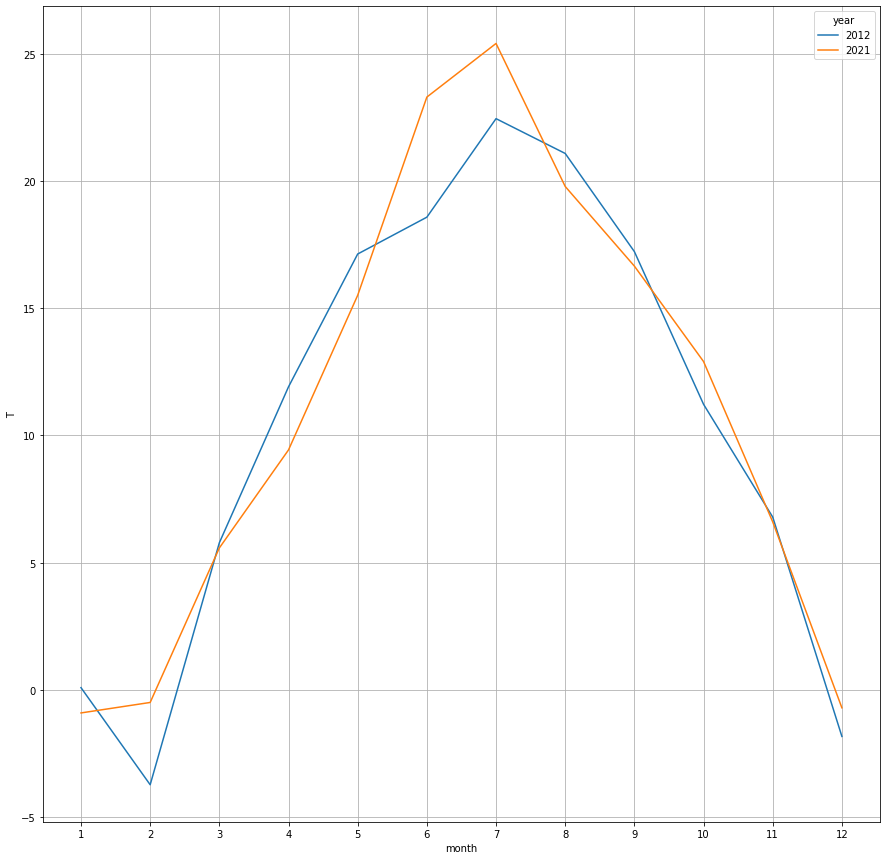

In [16]:
ax = tmp14_pivot.plot(xticks=tmp14_pivot.index,figsize = (15,15),grid = True)
ylab = ax.set_ylabel('T')

In [17]:
tmp_pivot = tmp.pivot_table(index = ['year','month','hh'],values='T',aggfunc='mean')

#calls_pivot.columns = ['count_calls','duration']
tmp_pivot

T
year month hh          
2012 1     2  -1.656667
           5  -1.651613
           8  -2.006452
           11 -0.830000
           14  0.090323
...                 ...
2021 12    11 -1.960000
           14 -0.703333
           17 -1.316129
           20 -1.758065
           23 -1.522581

[192 rows x 1 columns]

In [18]:
daterange = pd.date_range('2022-06-01 14:00:00', '2022-08-01 14:00:00')
#t_summer=data[daterange].mean()


In [19]:
daterange[0]

Timestamp('2022-06-01 14:00:00', freq='D')